In [2]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [3]:
# Reset pseudo random number generator so that the results are reproducible.
np.random.seed(42)

## Conjunto de dados pequeno e com ruído

In [3]:
# Sets the number of examples.
N = 30

# Attribute.
x1 = np.linspace(-3, 3, N).reshape(N, 1)

# Create target function.
# Second order polynomial.
y = 2 + x1 + 0.5*x1**2

# Observable function.
y_noisy = y + np.random.randn(N, 1)

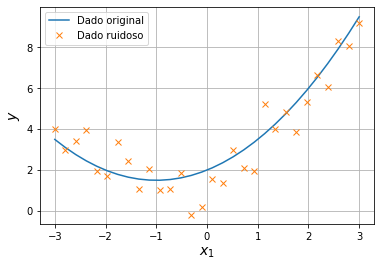

In [4]:
plt.plot(x1, y, label='Dado original')
plt.plot(x1, y_noisy, 'x', label='Dado ruidoso')
plt.legend(loc='best')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.grid()
# Save figure
#plt.savefig("poly-reg-data.png", dpi=600)
#Show the plot.
plt.show()

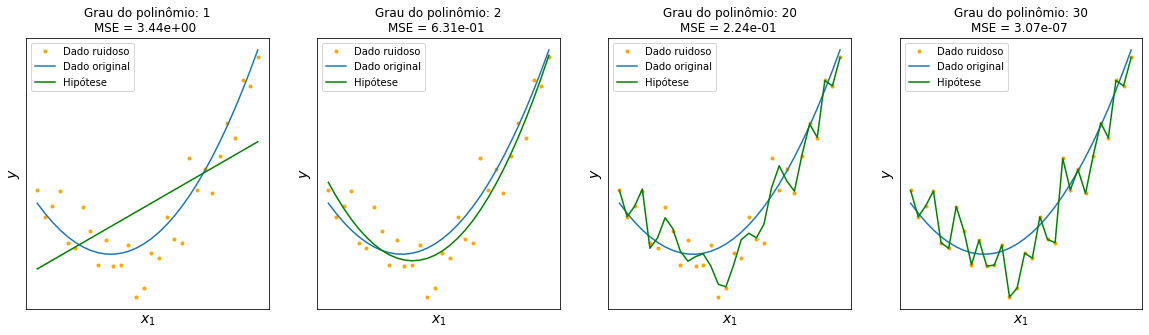

In [5]:
# Polinomial degrees to be tested.
degrees = [1, 2, 20, 30]

# Include column of ones once the target function has a bias.
include_bias = True

plt.figure(figsize=(20, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())    

    # Instantiate a polynomial with the given degree.
    poly = PolynomialFeatures(degree=degrees[i], include_bias=include_bias)
    # Instantiate a scaler that will standardize the features.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    # Train the polinomial model, i.e., the hypothesis.
    polynomial_regression.fit(x1, y_noisy)
    
    # Use the trained model for prediction.
    yp1 = polynomial_regression.predict(x1)
    
    # Calculate the Mean Squared Error (MSE) between target and predicted values.
    mse = mean_squared_error(y_noisy, yp1)
    
    plt.plot(x1, y_noisy, '.', color='orange', label='Dado ruidoso')
    plt.plot(x1, y, label='Dado original')
    plt.plot(x1, yp1, 'g', label='Hipótese')
    plt.legend(loc='best')
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$y$', fontsize=14)
    plt.grid()
    plt.title("Grau do polinômio: {}\nMSE = {:.2e} ".format(degrees[i], mse))

#Show the plot.
plt.show()

Como podemos percerber, o erro quadrático médio (MSE) é menor para o polinômio de ordem 30, pois devido à sua "complexidade/flexibilidade" ele se "ajusta" quase que perfeitamente aos dados de treinamento, "aprendendo" até o ruído presente.

É como se o modelo **memorizasse** os dados de treinamento.

## Conjunto de dados pequeno, porém, sem ruído

In [6]:
# Reset pseudo random number generator so that the results are reproducible.
np.random.seed(42)

In [7]:
# Sets the number of examples.
N = 30

# Attribute.
x1 = np.linspace(-3, 3, N).reshape(N, 1)

# Create target function
y = 2 + x1 + 0.5*x1**2

# Observable function.
y_noisy = y

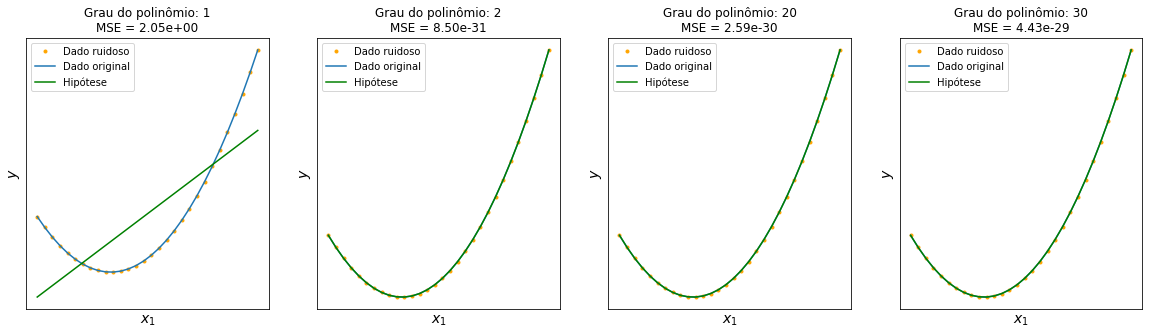

In [8]:
# Polinomial degrees to be tested.
degrees = [1, 2, 20, 30]

# Include column of ones once the target function has a bias.
include_bias = True

plt.figure(figsize=(20, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())    

    # Instantiate a polynomial with the given degree.
    poly = PolynomialFeatures(degree=degrees[i], include_bias=include_bias)
    # Instantiate a scaler that will standardize the features.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    # Train the polinomial model, i.e., the hypothesis.
    polynomial_regression.fit(x1, y_noisy)
    
    # Use the trained model for prediction.
    yp1 = polynomial_regression.predict(x1)    
    
    # Calculate the Mean Squared Error (MSE) between target and predicted values.
    mse = mean_squared_error(y_noisy, yp1)
    
    plt.plot(x1, y_noisy, '.', color='orange', label='Dado ruidoso')
    plt.plot(x1, y, label='Dado original')
    plt.plot(x1, yp1, 'g', label='Hipótese')
    plt.legend(loc='best')
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$y$', fontsize=14)
    plt.grid()
    plt.title("Grau do polinômio: {}\nMSE = {:.2e}".format(degrees[i], mse))

#Show the plot.
plt.show()

Como não existe ruído sendo adicionado aos exemplos do polinômio gerador, qualquer polinômio com ordem maior ou igual à ordem do polinômio (neste caso, 2) já consegue aproximar perfeitamente os dados de treinamento.

## Conjunto de treinamento maior e com ruído

In [9]:
# Reset pseudo random number generator so that the results are reproducible.
np.random.seed(42)

In [10]:
# Sets the number of examples.
N = 1000

# Attribute.
x1 = np.linspace(-3, 3, N).reshape(N, 1)

# Create target function
y = 2 + x1 + 0.5*x1**2

# Observable function.
y_noisy = y + np.random.randn(N, 1)

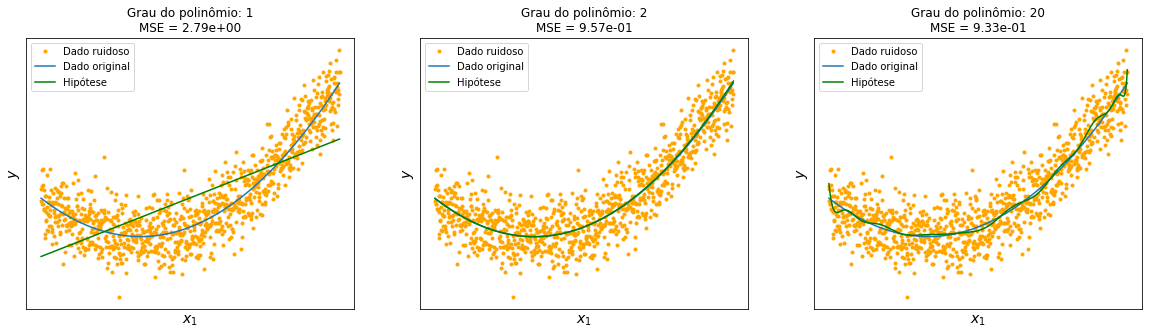

In [11]:
# Polinomial degrees to be tested.
degrees = [1, 2, 20]

# Include column of ones once the target function has a bias.
include_bias = True

plt.figure(figsize=(20, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())    

    # Instantiate a polynomial with the given degree.
    poly = PolynomialFeatures(degree=degrees[i], include_bias=include_bias)
    # Instantiate a scaler that will standardize the features.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    # Train the polinomial model, i.e., the hypothesis.
    polynomial_regression.fit(x1, y_noisy)
    
    # Use the trained model for prediction.
    yp1 = polynomial_regression.predict(x1)    
    
    # Calculate the Mean Squared Error (MSE) between target and predicted values.
    mse = mean_squared_error(y_noisy, yp1)
    
    plt.plot(x1, y_noisy, '.', color='orange', label='Dado ruidoso')
    plt.plot(x1, y, label='Dado original')
    plt.plot(x1, yp1, 'g', label='Hipótese')
    plt.legend(loc='best')
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$y$', fontsize=14)
    plt.grid()
    plt.title("Grau do polinômio: {}\nMSE = {:.2e}".format(degrees[i], mse))

#Show the plot.
plt.show()

A aproximação é melhor quanto maior for o conjunto de treinamento. 

Para ordem 2, vamos que o aumento do conjunto de treinamento resultou em um modelo melhor.

## Conjunto de treinamento maior ainda

In [12]:
# Reset pseudo random number generator so that the results are reproducible.
np.random.seed(42)

In [13]:
# Sets the number of examples.
N = 100000

# Attribute.
x1 = np.linspace(-3, 3, N).reshape(N, 1)

# Create target function.
y = 2 + x1 + 0.5*x1**2

# Observable function.
y_noisy = y + np.random.randn(N, 1)

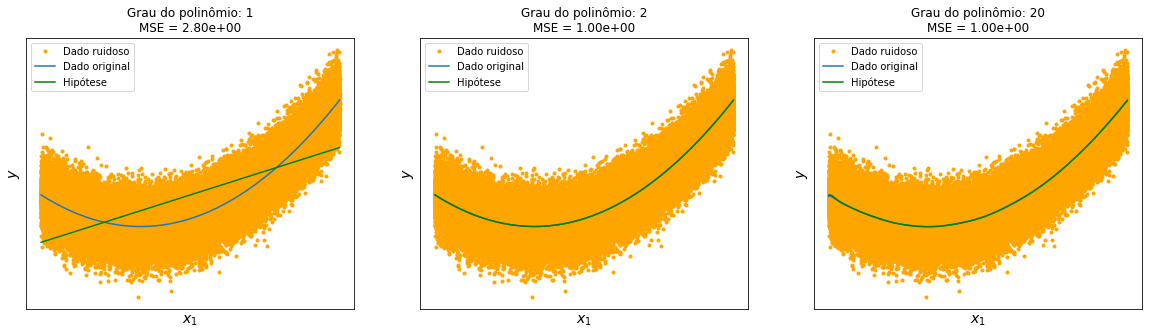

In [14]:
# Polinomial degrees to be tested.
degrees = [1, 2, 20]

# Include column of ones once the target function has a bias.
include_bias = True

plt.figure(figsize=(20, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())    

    # Instantiate a polynomial with the given degree.
    poly = PolynomialFeatures(degree=degrees[i], include_bias=include_bias)
    # Instantiate a scaler that will standardize the features.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    # Train the polinomial model, i.e., the hypothesis.
    polynomial_regression.fit(x1, y_noisy)
    
    # Use the trained model for prediction.
    yp1 = polynomial_regression.predict(x1)    
    
    # Calculate the Mean Squared Error (MSE) between target and predicted values.
    mse = mean_squared_error(y_noisy, yp1)

    plt.plot(x1, y_noisy, '.', color='orange', label='Dado ruidoso')
    plt.plot(x1, y, label='Dado original')
    plt.plot(x1, yp1, 'g', label='Hipótese')
    plt.legend(loc='best')
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$y$', fontsize=14)
    plt.grid()
    plt.title("Grau do polinômio: {}\nMSE = {:.2e}".format(degrees[i], mse))

#Show the plot.
plt.show()

Encontra-se os pesos que fazem com que a função hipótese polinomial escolhida tenha o **erro** (quadrático) **médio** minimizado para todos os valores de $x_1$. 

Vejam que como a ordem do polinômio é muito menor do que a quantidade de amostras, a função hipótese polinomial escolhida não se ajusta perfeitamento aos pontos, mas acaba se ajustando à média dos valores de $y$ naquele determinado valor de $x_1$.

Como utilizamos muitos exemplos de treinamento, a capacidade do modelo não é suficiente para passar por todos os pontos, ele então deixa de aprender o ruído para se concentrar em aprender a função por trás do processo de geração dos dados.

A figura abaixo deixa isso mais claro.

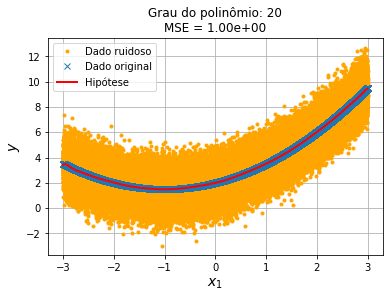

In [16]:
plt.plot(x1, y_noisy, '.', color='orange', label='Dado ruidoso')
plt.plot(x1, y, 'x', label='Dado original')
plt.plot(x1, yp1, 'r', linewidth=2, label='Hipótese')
plt.legend(loc='best')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.grid()
plt.title("Grau do polinômio: {}\nMSE = {:.2e}".format(degrees[i], mse))
plt.show()